<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* Customer Analysis
* Iterator

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta

import os 
import re 

from collections import defaultdict
from functools import reduce

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Customer Analysis

In [2]:
os.listdir()

['.config',
 'sales.csv',
 'ecommerce-data.csv',
 'sales_vs_discount.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mock_sales_data.csv',
 'scanner_data.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_order_payments_dataset.csv',
 'test.csv',
 'sales_data_with_stores.csv',
 '1_customers_dataset.csv',
 'mall_customers.csv',
 'groceries.csv',
 'online_retail.xlsx',
 '1_orders_dataset.csv',
 'sample_data']

In [7]:
df_pay = pd.read_csv('1_order_payments_dataset.csv')
df_ord = pd.read_csv('1_orders_dataset.csv')

In [9]:
df_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            103886 non-null  int64  
 1   order_id              103886 non-null  object 
 2   payment_sequential    103886 non-null  int64  
 3   payment_type          103886 non-null  object 
 4   payment_installments  103886 non-null  int64  
 5   payment_value         103886 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [10]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
df = pd.merge(df_ord, df_pay, 'left', 'order_id')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Unnamed: 0,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,10770.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,44246.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,91130.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00,7652.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00,11176.0,1.0,credit_card,3.0,179.12


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   Unnamed: 0                     103886 non-null  float64
 9   payment_sequential             103886 non-null  float64
 10  payment_type                   103886 non-null  object 
 11  payment_installments           103886 non-null  float64
 12  payment_value                 

In [18]:
df = df[['customer_id', 'order_status', 'order_purchase_timestamp', 'payment_value']]
df.columns = ['id', 'status', 'log_date', 'rev']
df.head()

,id,status,log_date,rev
0,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,18.12
1,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2.00
2,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,18.59
3,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,141.46
4,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,179.12


In [19]:
df.log_date = pd.to_datetime(df.log_date)
df['date'] = df.log_date.to_numpy().astype('datetime64[D]')
df['month'] = df.log_date.to_numpy().astype('datetime64[M]')

In [36]:
list_id = dict(zip([a for a in df['id'].unique()], list(range(1, 99442))))
df = df.assign(id = df['id'].apply(lambda x : list_id.get(x, x)))
df.head()

,id,status,log_date,rev,date,month
0,1,delivered,2017-10-02 10:56:33,18.12,2017-10-02,2017-10-01
1,1,delivered,2017-10-02 10:56:33,2.00,2017-10-02,2017-10-01
2,1,delivered,2017-10-02 10:56:33,18.59,2017-10-02,2017-10-01
3,2,delivered,2018-07-24 20:41:37,141.46,2018-07-24,2018-07-01
4,3,delivered,2018-08-08 08:38:49,179.12,2018-08-08,2018-08-01


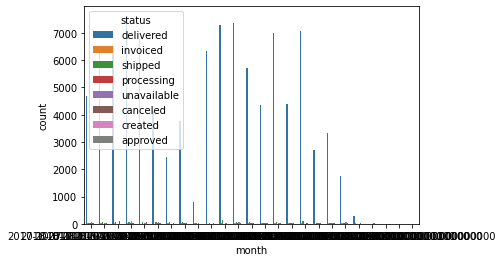

In [39]:
sns.countplot(data = df, x = 'month', hue = 'status')

In [44]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1,0])
info_m = info_m.groupby(['id']).head(6)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,1,0.00
1,2,141.46
2,3,179.12
3,4,0.00
4,5,0.00


In [47]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'freq'], ascending = [1,0])
info_f = info_f.groupby(['id']).head(6)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,1,3.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0


In [52]:
date_max = df['date'].max() + pd.offsets.MonthEnd(0)
date_max

Timestamp('2018-10-31 00:00:00')

In [53]:
info_r = df.groupby(['id']).agg({'date' : lambda x : (date_max - x.max())}).reset_index().rename(columns = {'date':'recency'})
info_r['recency'] = info_r['recency'].dt.days
info_r.head()

,id,recency
0,1,394
1,2,99
2,3,84
3,4,347
4,5,260


In [54]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,1,394,3.0,0.00
1,2,99,1.0,141.46
2,3,84,1.0,179.12
3,4,347,1.0,0.00
4,5,260,1.0,0.00


In [58]:
info = info.assign(
    r = pd.qcut(info.recency, 5, list('12345')).astype(int),
    f = pd.qcut(info.freq.rank(method = 'first'), 5, list('54321')).astype(int),
    m = pd.qcut(info.money.rank(method = 'first'), 5, list('54321')).astype(int)
)
info.head()

,id,recency,freq,money,r,f,m
0,1,394,3.0,0.00,4,1,5
1,2,99,1.0,141.46,1,5,1
2,3,84,1.0,179.12,1,5,1
3,4,347,1.0,0.00,4,5,5
4,5,260,1.0,0.00,3,5,5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log


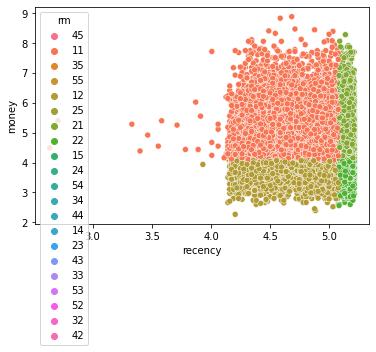

In [65]:
sns.scatterplot(data = info.assign(
    recency = [np.log(a) for a in info['recency']],
    money = [np.log(a) for a in info['money']],
    rm = info.r.astype(str) + info.m.astype(str)
    ), 
                    x = 'recency', y = 'money', hue = 'rm')

In [67]:
scaler = StandardScaler()
std = scaler.fit_transform(info[['recency', 'freq', 'money']])
km = KMeans(n_clusters = 4)
km.fit(std)
info['flag'] = km.fit_predict(std).astype(str)
info.head()

,id,recency,freq,money,r,f,m,flag
0,1,394,3.0,0.00,4,1,5,0
1,2,99,1.0,141.46,1,5,1,3
2,3,84,1.0,179.12,1,5,1,3
3,4,347,1.0,0.00,4,5,5,0
4,5,260,1.0,0.00,3,5,5,3


# Iterator

In [69]:
name = ['kim', 'lee', 'park']
email1 = [''.join(np.random.choice(list('abcdef'), 10, replace = True)) for a in range(3)]
email2 = [''.join(np.random.choice(list('abcdef'), 5, replace = True)) for a in range(3)]
email = [a + '@' + b + np.random.choice(['.com', 'co.kr'], 1)[0] for a, b in zip(email1, email2)]
age = np.random.randint(20, 40, 3)
rev = np.random.randint(1000, 5000, 3)

In [72]:
[{ title : list(x) } for title, x  in zip(['name', 'email', 'age', 'rev'], zip(name, email, age, rev))]

[{'name': ['kim', 'fdceceffda@dbddcco.kr', 29, 2473]},
 {'email': ['lee', 'cededaedce@daeabco.kr', 31, 1553]},
 {'age': ['park', 'fbdafefaef@bafcd.com', 22, 2816]}]